# Ford GoBike System Data Exploration
## by Nathapon Tansit


## Preliminary Wrangling
    This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
bike_org = pd.read_csv('201902-fordgobike-tripdata.csv')

### Drop null values


In [3]:
#Drop all row with null values
bike_clean = bike_org.dropna()

In [4]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

### Data Assessment

In [5]:
bike_org.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


#### Quality issues

    1. 'start_time' and 'end_time' should be in datetime format
    
    2. 'start_station_id' and 'end_station_id' should be int format
    
    3. 'member_birth_year' should be int
    
    4. drop unnecessary columns ['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_id']
    

#### Tidyness issues

    1. 'duration_sec' should be transformed to minutes
    2. 'start_time' should be extracted to these column 'start_day','start_hour','start_dayname'
    3. 'member_age' column should be added
    

### Data Cleaning

#### Quality issues

In [6]:
#Change data type to datetime
bike_clean['start_time'] = pd.to_datetime(bike_clean['start_time'])
bike_clean['end_time'] = pd.to_datetime(bike_clean['end_time'])

#Change data type to int
bike_clean['start_station_id']=bike_clean['start_station_id'].astype(int)
bike_clean['end_station_id']=bike_clean['end_station_id'].astype(int)
bike_clean['member_birth_year']=bike_clean['member_birth_year'].astype(int)

C:\Users\User\AppData\Local\Temp/ipykernel_21736/2977193252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_clean['start_time'] = pd.to_datetime(bike_clean['start_time'])
C:\Users\User\AppData\Local\Temp/ipykernel_21736/2977193252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_clean['end_time'] = pd.to_datetime(bike_clean['end_time'])
C:\Users\User\AppData\Local\Temp/ipykernel_21736/2977193252.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [7]:
#verify data type correction
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [8]:
bike_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,Jones St at Post St,37.787327,-122.413278,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes


In [9]:
#drop unnecessary columns
bike_clean = bike_clean.drop(['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_id'], axis=1)

In [10]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No


#### Tidyness issues

#####    1. 'duration_sec' should be transformed to minutes

In [11]:
#Transform duration from unit of second to minutes by divided by 60 and transform datatype to int
bike_clean['duration_min']=(bike_clean['duration_sec']/60).astype(int)

In [12]:
bike_clean.head(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,869
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other,No,608
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No,29
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,Subscriber,1983,Female,No,19
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,Subscriber,1989,Male,No,26
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Washington St at Kearny St,Valencia St at 21st St,Subscriber,1988,Other,No,26
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,Mission Playground,Subscriber,1992,Male,No,17
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,Subscriber,1996,Female,Yes,7


Now we have ride duration in unit of minutes

##### 2. 'start_time' should be extracted to these column 'start_day','start_hour','start_dayname'

In [13]:
#extract from start time to day Ex:2019-02-28 17:32:10.145 to 28
bike_clean['start_day'] = bike_clean['start_time'].dt.day

#extract from start time to hour Ex:2019-02-28 17:32:10.145 to 17
bike_clean['start_hour'] = bike_clean['start_time'].dt.hour

#extract from start time to day name Ex:2019-02-28 17:32:10.145 to Thursday
bike_clean['start_dayname'] = bike_clean['start_time'].dt.day_name()

In [14]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_day,start_hour,start_dayname
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,869,28,17,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,1030,28,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other,No,608,28,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,26,28,23,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No,29,28,23,Thursday


##### 3. 'member_age' column should be added

In [15]:
#since data are recorded in 2019, so we calculate member age at that year.
bike_clean['member_age'] = 2019-bike_clean['member_birth_year']

In [16]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_day,start_hour,start_dayname,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,869,28,17,Thursday,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,1030,28,12,Thursday,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989,Other,No,608,28,17,Thursday,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,26,28,23,Thursday,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No,29,28,23,Thursday,60


In [17]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   user_type                174952 non-null  object        
 6   member_birth_year        174952 non-null  int32         
 7   member_gender            174952 non-null  object        
 8   bike_share_for_all_trip  174952 non-null  object        
 9   duration_min             174952 non-null  int32         
 10  start_day                174952 non-null  int64         
 11  start_hour               174952 non-null  int64         
 12  start_dayname   

In [18]:
bike_clean.to_csv('bike_clean.csv', index=False)

### What is the structure of your dataset?

> There are 174952 rides information in the data set with 14 features (duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip, duration_min,start_day, start_hour, start_dayname, member_age). 
> - Numeric variables are duration_sec,start_time,end_time,member_birth_year, duration_min,start_day, start_hour and member_age
> - Categorical variables are start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip and start_dayname (all are nominal, no ordinal variables in this dataframe)

### What is/are the main feature(s) of interest in your dataset?

> Main features are duration, start_time, user information(type, gender, age)


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that there is different in ride duration for each type of user(type, gender, age). Start_time could be extracted into day, hour and dayname to explore ride distribution.

## Univariate Exploration

### Question 1 : What is average ride duration?

#### Visualization

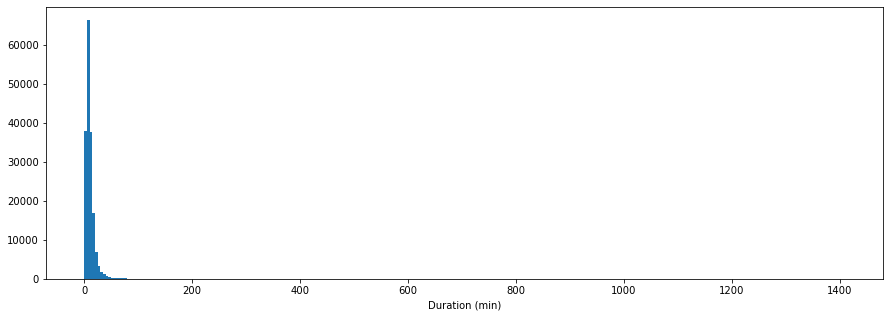

In [19]:
#Set up bin size and number of bins
binsize = 5
bins = np.arange(0, bike_clean['duration_min'].max()+binsize, binsize)
#Set figure size
plt.figure(figsize=[15, 5])
#Make histogram plot
plt.hist(data = bike_clean, x = 'duration_min', bins = bins)
#Set label for x axis
plt.xlabel('Duration (min)')
plt.show()

In [20]:
bike_clean['duration_min'].max()

1409

Most of ride duration are below 100 minutes. There are extreme outliers on the right (max = 1409).
So we make another plot to focus only below 100 minutes.

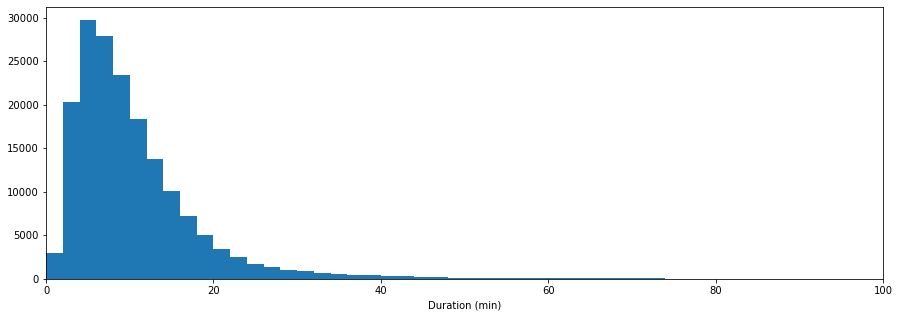

In [21]:
#Set up bin size and number of bins
binsize = 2
bins = np.arange(0, bike_clean['duration_min'].max()+binsize, binsize)
#Set figure size
plt.figure(figsize=[15, 5])
#Make histogram plot
plt.hist(data = bike_clean, x = 'duration_min', bins = bins)
#Limit plot range for x-axis between 0 to 100 minutes
plt.xlim([0,100])
#Set label for x axis
plt.xlabel('Duration (min)')
plt.show()

#### Observation
    Duration has a long-tailed distribution. There are a lot of low ride duration and a few on high ride duration. The is one peak between 4 and 6 minutes.

### Question 2 : What is proportion between subscribers and casual users?

#### Visualization

In [22]:
#Count number for each type of users
bike_user = bike_clean['user_type'].value_counts()
bike_user

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

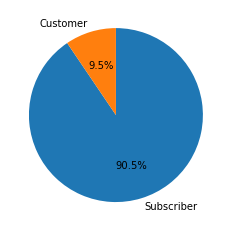

In [23]:
#Plot pie chart, format number on piechart as percentages
plt.pie(bike_user, labels = bike_user.index, startangle = 90,counterclock = False, autopct='%1.1f%%');

#### Observation
    90.5% of users are subscribers (158386 subscriber). And 9.5% of users are casual users (16566 casual user)

### Question 3 : What is users' average age?

#### Visualization

141

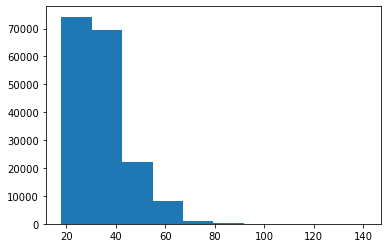

In [24]:
#Make histogram plot for member age
plt.hist(data = bike_clean, x = 'member_age');

#Find users max age
bike_clean.member_age.max()

Users' age distribution are right skewed. Oldest user is 141 years old. This is impossible because I think that 141 years old people should not ride bike. So we focus on people younger than 80 years old.

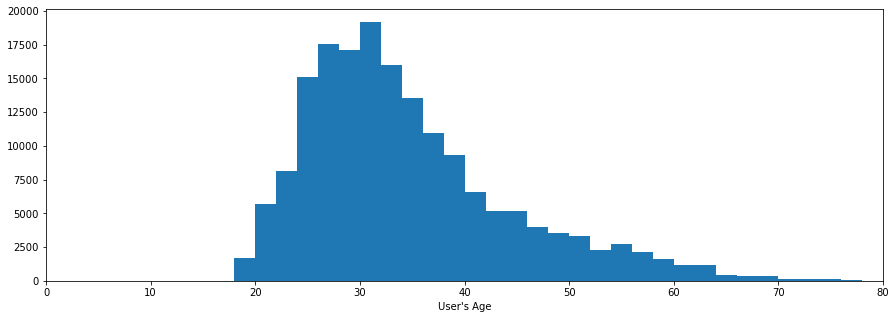

In [25]:
#Set up bin size and number of bins
binsize = 2
bins = np.arange(0, bike_clean['member_age'].max()+binsize, binsize)

#Set up figure size
plt.figure(figsize=[15, 5])

#Plot histograms
plt.hist(data = bike_clean, x = 'member_age', bins = bins)
plt.xlim([0,80])  #setup x-axis limits between 0 to 80 years
plt.xlabel('User\'s Age') #set label for x axis
plt.show()

#### Observation
    User's age distribution is right skewed. Most user's age range is from 18 to 80 years. Average users age is around 30 years old.

### Question 4 : What is proportion of user's gender?

#### Visualization

In [26]:
#Count number of users for each gender
bike_gender = bike_clean['member_gender'].value_counts()
bike_gender

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

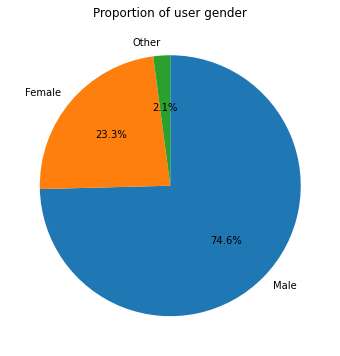

In [27]:
#set up figure size
plt.figure(figsize=[6, 6])

#Make pie plot in term of percentage
plt.pie(bike_gender, labels = bike_gender.index, startangle = 90,counterclock = False, autopct='%1.1f%%');

#add title
plt.title('Proportion of user gender');

#### Observation
    74.6% of users(130500) are male. 
    23.3% (40805) are female. 
    And the rest 2.1% (3647) are others.

### Question 5 : Which station is the most popular starting point?

#### Visualization

In [28]:
#Query top 5 by using value_counts method then ascend ordering and select last 5 rows
station = bike_clean['start_station_name'].value_counts(ascending = True).tail(5)
station

Powell St BART Station (Market St at 4th St)                 2620
Montgomery St BART Station (Market St at 2nd St)             2711
Berry St at 4th St                                           2952
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Market St at 10th St                                         3649
Name: start_station_name, dtype: int64

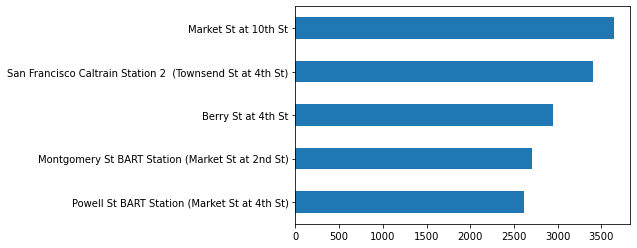

In [29]:
#Plot horizontal bar chart
station.plot.barh();

#### Observation
    The most popular starting station is Market St at 10th St.           (3649 times)
    Second is San Francisco Caltrain Station 2  (Townsend St at 4th St). (3408 times)
    Third is Berry St at 4th St.                                         (2952 times)
    Forth is Montgomery St BART Station (Market St at 2nd St).           (2711 times)
    And fifth is Powell St BART Station (Market St at 4th St).           (2620 times)

### Question 6 : Which station is the most unpopular starting point?

#### Visualization

In [30]:
#Query last 5 by using value_counts method then ascend ordering and select top 5 rows
station = bike_clean['start_station_name'].value_counts(ascending = True).head(5)
station

16th St Depot                     2
Palm St at Willow St              3
21st Ave at International Blvd    4
Parker Ave at McAllister St       7
Farnam St at Fruitvale Ave        9
Name: start_station_name, dtype: int64

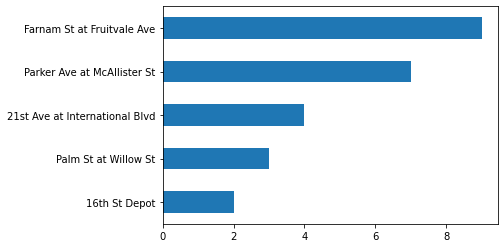

In [31]:
#Plot horizontal bar chart
station.plot.barh();

#### Observation
    The most unpopular starting station is 16th St Depot.  (2 times)
    Second is Palm St at Willow St.                        (3 times)
    Third is 21st Ave at International Blvd.               (4 times)
    Forth is Parker Ave at McAllister St.                  (7 times)
    And fifth is Farnam St at Fruitvale Ave.               (9 times)

### Question 7 : Which station is the most popular ending point?

#### Visualization

In [32]:
#Query top 5 by using value_counts method then ascend ordering and select last 5 rows
station = bike_clean['end_station_name'].value_counts(ascending = True).tail(5)
station

San Francisco Caltrain (Townsend St at 4th St)               2870
San Francisco Ferry Building (Harry Bridges Plaza)           3151
Montgomery St BART Station (Market St at 2nd St)             3461
Market St at 10th St                                         3709
San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Name: end_station_name, dtype: int64

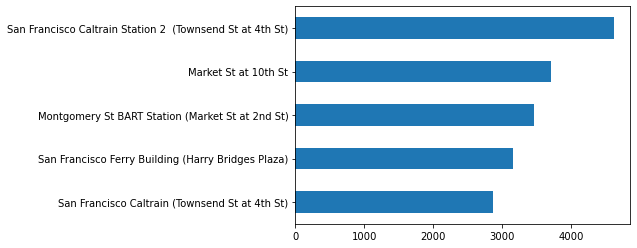

In [33]:
#Plot horizontal bar chart
station.plot.barh();

#### Observation
    The most popular starting station is San Francisco Caltrain Station 2  (Townsend St at 4th St)  (4624 times)
    Second is Market St at 10th St                                                                  (3709 times)
    Third is Montgomery St BART Station (Market St at 2nd St)                                       (3461 times)
    Forth is San Francisco Ferry Building (Harry Bridges Plaza)                                     (3151 times)
    And fifth is San Francisco Caltrain (Townsend St at 4th St)                                     (2870 times)

### Question 8 : Which station is the most unpopular ending point?

#### Visualization

In [34]:
#Query last 5 by using value_counts method then ascend ordering and select top 5 rows
station = bike_clean['end_station_name'].value_counts(ascending = True).head(5)
station

Willow St at Vine St              5
21st Ave at International Blvd    5
16th St Depot                     6
Palm St at Willow St              7
Parker Ave at McAllister St       9
Name: end_station_name, dtype: int64

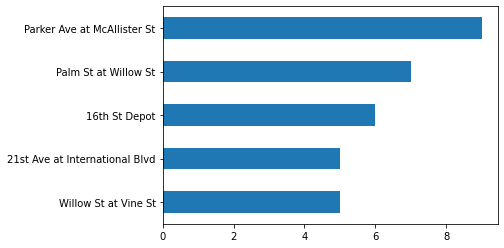

In [35]:
#Plot horizontal bar chart
station.plot.barh();

#### Observation
    The most unpopular starting station is Willow St at Vine St  (5 times)
    Second is 21st Ave at International Blvd                     (5 times)
    Third is 16th St Depot                                       (6 times)
    Forth is Palm St at Willow St                                (7 times)
    And fifth is Parker Ave at McAllister St                     (9 times)

### Question 9: What is the most popular time to use bike service

#### Visualization

In [53]:
#define function countplot template
def BikeCountPlot(df,xVar,hueVar=None,order = None, figsize = [20,5]):
    '''
    This function is to count plot but in my color and size template
    input : df = dataframe to plot
            xVar = variable to plot on x axis
            hueVar = hue variable in plot
            order = order to display in plot
            figsize = desired plot dimension default = [20,5]
    output : countplot
    '''
    #set figure size
    plt.figure(figsize=figsize);
    #plot countplot
    sb.countplot(data=df,x=xVar, hue=hueVar, color = sb.color_palette()[0], order = order, edgecolor='black');
    #Add y-label
    plt.ylabel('Frequency')

In [54]:
#Set up ticks and label for start_hour on x-axis
ticks = [00.00,01.00,02.00,03.00,04.00,05.00,06.00,07.00,08.00,09.00,10.00,11.00,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00,22.00,23.00]
labels = ['00.00','01.00','02.00','03.00','04.00','05.00','06.00','07.00','08.00','09.00','10.00','11.00','12.00','13.00','14.00','15.00','16.00','17.00','18.00','19.00','20.00','21.00','22.00','23.00']

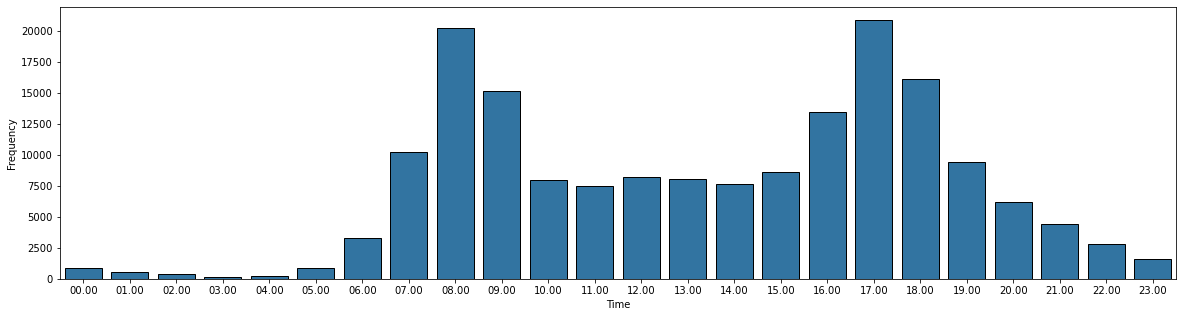

In [55]:
#Plot countplot
BikeCountPlot(bike_clean, 'start_hour')
#Add label and ticks for x-axis
plt.xlabel('Time');
plt.xticks(ticks, labels);

#### Observation
    Bike services are most used around 8.00 and 17.00. Users are not likely to use bike during 00.00 to 05.00.

### Question 10 : What day that people most use bike services?

#### Visualization

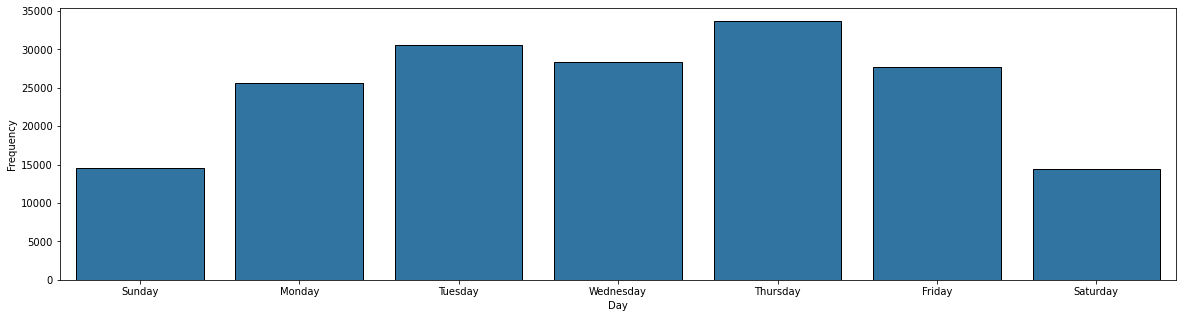

In [56]:
#Set up day order
day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
#Plot countplot
BikeCountPlot(bike_clean, 'start_dayname',order=day_order)
#Add label
plt.xlabel('Day');

#### Observation
    Bike service is most used on Thursday. People tends to use bike service on weekday much more than weekend.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There is a 141-year-old user. This is impossible. I considered as an extreme outlier and re-ploted distribution in possible age range (0-80 years old) 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I've already transformed data into desired columns as in wrangling method because these data are not easy to use. For example, member_birth_year column is not useful. It will be more useful if we transform it to member_age.

## Bivariate Exploration

### Question 11 : Do subscribers take rides longer than casual users?

#### Visualization

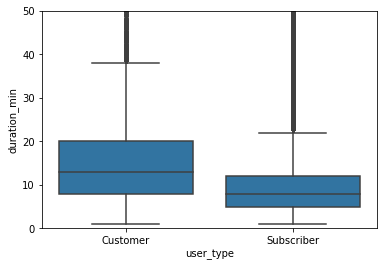

In [60]:
#Boxplot between user type and durtion
sb.boxplot(data=bike_clean, x='user_type', y='duration_min', color=base_color);
#set y-axis range from 0 to 50 minutes
plt.ylim([0,50]);

#### Observation
    Casual customers tend to ride longer than subscribers. However subscribers ride duration have less varient.

### Question 12: Are there any different between casual customers and subscribers in bike service usage time ?

#### Visualization

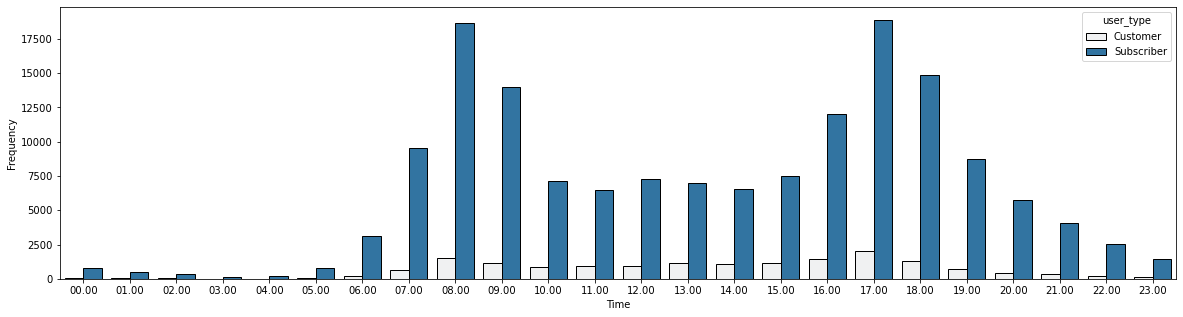

In [58]:
#Plot countplot
BikeCountPlot(bike_clean, 'start_hour', hueVar = 'user_type')
#Add label and ticks for x-axis
plt.xlabel('Time');
plt.xticks(ticks, labels);

#### Observation
    Both casual customers and subscibers have the same trend. Few users between 00.00 and 05.00. Peak at 08.00 and 17.00.

### Question 13: Which genders is most likely to be our subscribers?

#### Visualization

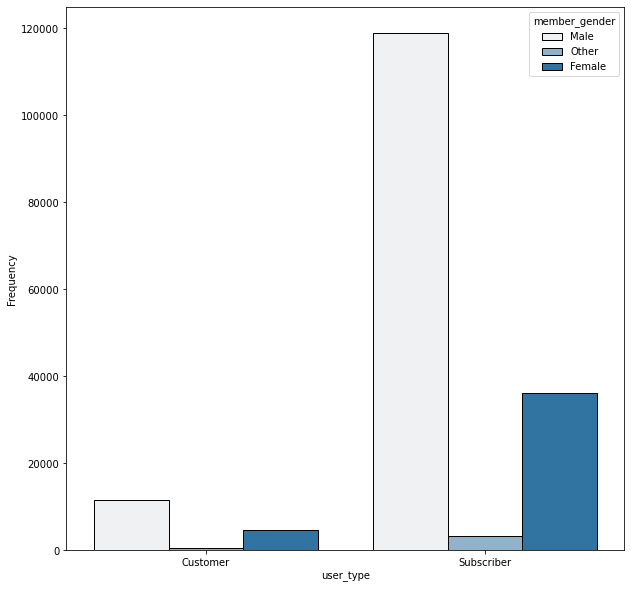

In [62]:
#Use BikeCountPlot to plot
BikeCountPlot(bike_clean, 'user_type', hueVar = 'member_gender', figsize=[10,10])

#### Observation
    Male are most likely to be subscribers. However proportion among Male, Female and Other are similar to both casual customer and subscribers.

### Question 14 : Which gender rides the longest ?

#### Visualization

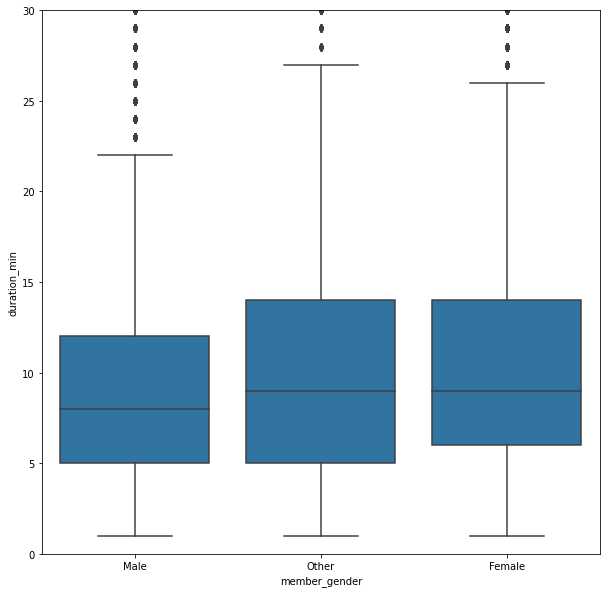

In [63]:
#Setup fig size
plt.figure(figsize=[10, 10])
#Make boxplot
sb.boxplot(data=bike_clean, x='member_gender', y='duration_min', color=base_color);
#set y range limit to 30 min
plt.ylim([0,30]);

#### Observation
    Female and other both rides logest (median about 9 mins). Male ride in median of 8 minutes

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> About ride duration, bike usage time in subscribers are less than casual customer. Moreover male customers' ride duration are less than botn female and other.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Peak time of bike services is the same hour (8.00 and 17.00) for both casual user and subscribers.

> Most of subscribers are male similar to casual users.

## Multivariate Exploration

### Question 15 : Relationship between ride duration and time usage classified by user type?

#### Visualization

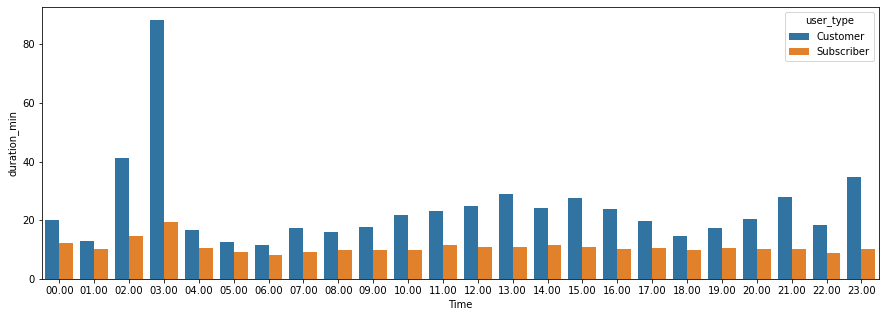

In [65]:
#determine plot size
plt.figure(figsize=[15, 5])

#make barplot y-axis = duration, x-axis as start_hour and huue as user_type
sb.barplot(data=bike_clean, x='start_hour', y='duration_min',ci=None, hue='user_type');

#Add x label and ticks
plt.xlabel('Time');
plt.xticks(ticks, labels);

#### Observation
    Casual customers always ride longer than subscribers. Ride duration of subscribers are very stable (less fluctuate) compared to casual customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  Casual customers always ride longer than subscribers. Ride duration of subscribers are very stable (less fluctuate) compared to casual customers

### Were there any interesting or surprising interactions between features?

> Ride durations of both casual customers and subscriber are higher at 2.00 and peak at 3.00

## Conclusions
#### Ride duration issue

    > The average ride duration is about 11 minutes.
    > Regular customers always ride longer than subscribers.
    > Male tends to ride shortest (fastest)
    
#### Customers issue
    
    > Almost of customers are subscribers, only 10% are casual customers.
    > Most of customers are about 25 to 35 years old.
    > 75% of customers are male. Proportion among male, female and other for both casual and subscribers are quite similar.

#### Station issue

    > Most popular starting point is Market St at 10th St   
    > Most popular end point is San Francisco Caltrain Station 2  (Townsend St at 4th St)
    > Most unpopular starting point is 16th St Depot 
    > Most unpopular end points are Willow St at Vine St and 21st Ave at International Blvd  

#### Service usage timing

    > Bike services are most used around 8.00 and 17.00.
    > Customers tend to use bike service on weekday much more than weekend.